# Linear Regression Example #3a (HDB Prices)


In [11]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats # Import the stats module
import pickle

In [5]:
# Load the data
data = pd.read_csv('singapore_hdb_resale_price_2020.csv')
print(data.head(10))

   year  month        town  bedrooms block        street_name  floor_area_sqm  \
0  2020      1  ANG MO KIO         3   208   ANG MO KIO AVE 1            73.0   
1  2020      1  ANG MO KIO         3  307C   ANG MO KIO AVE 1            70.0   
2  2020      1  ANG MO KIO         3   319   ANG MO KIO AVE 1            73.0   
3  2020      1  ANG MO KIO         3   216   ANG MO KIO AVE 1            73.0   
4  2020      1  ANG MO KIO         3   556  ANG MO KIO AVE 10            68.0   
5  2020      1  ANG MO KIO         3   536  ANG MO KIO AVE 10            68.0   
6  2020      1  ANG MO KIO         3   560  ANG MO KIO AVE 10            67.0   
7  2020      1  ANG MO KIO         3   463  ANG MO KIO AVE 10            82.0   
8  2020      1  ANG MO KIO         3   476  ANG MO KIO AVE 10            67.0   
9  2020      1  ANG MO KIO         3   442  ANG MO KIO AVE 10            67.0   

       flat_model  lease_commence_date  remaining_years  resale_price  storey  
0  New Generation           

In [7]:
print(data.info()) #structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14872 entries, 0 to 14871
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 14872 non-null  int64  
 1   month                14872 non-null  int64  
 2   town                 14872 non-null  object 
 3   bedrooms             14872 non-null  int64  
 4   block                14872 non-null  object 
 5   street_name          14872 non-null  object 
 6   floor_area_sqm       14872 non-null  float64
 7   flat_model           14872 non-null  object 
 8   lease_commence_date  14872 non-null  int64  
 9   remaining_years      14872 non-null  int64  
 10  resale_price         14872 non-null  float64
 11  storey               14872 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.4+ MB
None


In [9]:
# Separate the target variable
Y = data['resale_price']

# Select the feature variables (numeric variables)
X = data[['bedrooms', 'floor_area_sqm', 'lease_commence_date', 'remaining_years', 'storey']]

In [11]:
# Correlation between independent variables
print(data[['resale_price', 'bedrooms', 'floor_area_sqm', 'lease_commence_date', 'remaining_years', 'storey']].corr())

                     resale_price  bedrooms  floor_area_sqm  \
resale_price             1.000000  0.601056        0.564810   
bedrooms                 0.601056  1.000000        0.942361   
floor_area_sqm           0.564810  0.942361        1.000000   
lease_commence_date      0.418023  0.243256        0.164488   
remaining_years          0.416954  0.243815        0.165543   
storey                   0.414074  0.079953        0.019607   

                     lease_commence_date  remaining_years    storey  
resale_price                    0.418023         0.416954  0.414074  
bedrooms                        0.243256         0.243815  0.079953  
floor_area_sqm                  0.164488         0.165543  0.019607  
lease_commence_date             1.000000         0.999461  0.271753  
remaining_years                 0.999461         1.000000  0.270874  
storey                          0.271753         0.270874  1.000000  


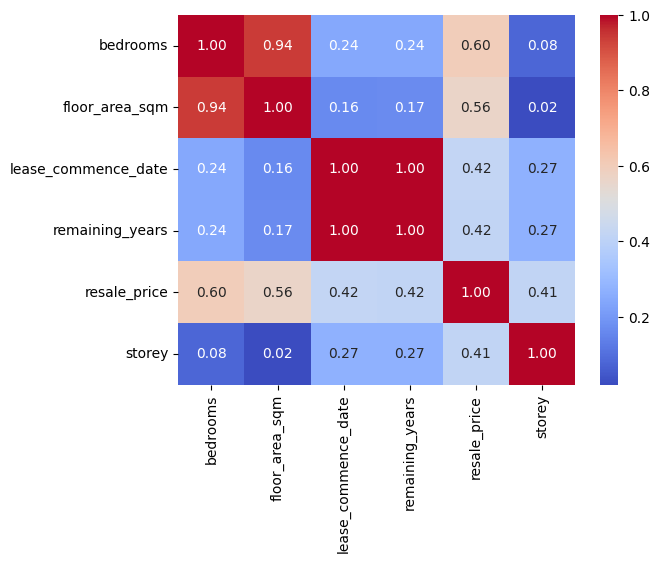

In [13]:
data_modified = data.drop(columns=['year', 'month'])  # Drop the 'year' column

# Select numeric types only and compute the correlation matrix
corr = data_modified.select_dtypes(include=[np.number]).corr()

# Generate a heatmap for the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [21]:
# Add a constant to the predictor variables
# X = sm.add_constant(X)

# # Fit the model
# model = sm.OLS(Y, X).fit()

# Train linear regression model
model = LinearRegression()
model.fit(X, Y)

# Calculate VIF
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif_data)

LinearRegression()

In [ ]:
filename = 'linear_regression_model_house.pkl'
pickle.dump(model, open(filename, 'wb'))

In [23]:
# Model summary
print(model.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [23]:
# Drop 'lease_commence_date' from the DataFrame before adding the constant
X = sm.add_constant( X.drop(columns=['lease_commence_date']))

# Fit the model using the modified DataFrame
model1 = sm.OLS(Y, X).fit()

# Calculate VIF on the DataFrame without 'lease_commence_date'
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns  # Ensure to reference the correct DataFrame
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           feature        VIF
0            const  42.944763
1         bedrooms   9.753882
2   floor_area_sqm   9.437122
3  remaining_years   1.171130
4           storey   1.095783


In [20]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4366.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:27:04   Log-Likelihood:            -1.9203e+05
No. Observations:               14872   AIC:                         3.841e+05
Df Residuals:                   14867   BIC:                         3.841e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.792e+05   5269.263    -

In [21]:
# Drop 'lease_commence_date' from the DataFrame before adding the constant
X = sm.add_constant( X.drop(columns=['bedrooms']))

# Fit the model using the modified DataFrame
model2 = sm.OLS(Y, X).fit()

# Calculate VIF on the DataFrame without 'lease_commence_date'
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns  # Ensure to reference the correct DataFrame
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # Use X.shape[1]
print(vif_data)

           feature        VIF
0            const  41.483540
1   floor_area_sqm   1.028903
2  remaining_years   1.109948
3           storey   1.079945


In [22]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     5658.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:27:18   Log-Likelihood:            -1.9214e+05
No. Observations:               14872   AIC:                         3.843e+05
Df Residuals:                   14868   BIC:                         3.843e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.644e+05   5218.386    -

In [38]:
# Manually add new code.

# Drop 'lease_commence_date' from the DataFrame before adding the constant
X = sm.add_constant( X.drop(columns=['remaining_years']))

# Fit the model using the modified DataFrame
model1 = sm.OLS(Y, X).fit()

# Calculate VIF on the DataFrame without 'lease_commence_date'
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns  # Ensure to reference the correct DataFrame
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

               feature           VIF
0                const  21770.604519
1             bedrooms      9.759701
2       floor_area_sqm      9.442051
3  lease_commence_date      1.172004
4               storey      1.096193


# Linear Regression Example #3b (US Population - Linear vs Quadratic)

In [40]:
# Load the USPop dataset
# Assuming USPop is a pandas DataFrame. If it's a CSV, use pd.read_csv to load it.
USPop = pd.read_csv('USPop.csv')  # replace with the correct path

In [42]:
# Attach equivalent (in pandas, just use the DataFrame directly)
year = USPop['year']
population = USPop['population']

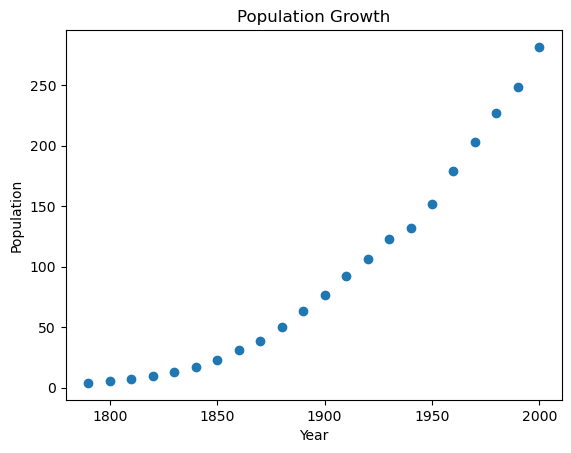

In [44]:
# Plot population growth
plt.scatter(year, population)
plt.title('Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [46]:
# Separate the target variable
Y = USPop['population']

# Select the feature variables (numeric variables)
X= USPop['year']

In [48]:
# Fit the OLS model
model = sm.OLS(Y, sm.add_constant(X)).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     229.5
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           2.00e-12
Time:                        14:12:56   Log-Likelihood:                -101.26
No. Observations:                  22   AIC:                             206.5
Df Residuals:                      20   BIC:                             208.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2347.7133    161.314    -14.554      0.0

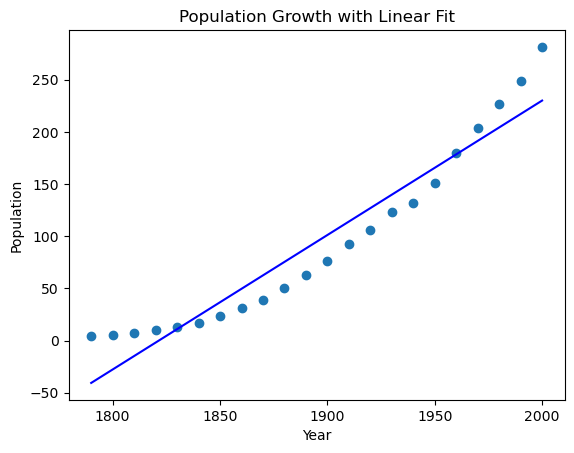

In [50]:
# Add regression line to the plot
plt.scatter(year, population)
plt.plot(year, model.fittedvalues, color='blue')
plt.title('Population Growth with Linear Fit')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

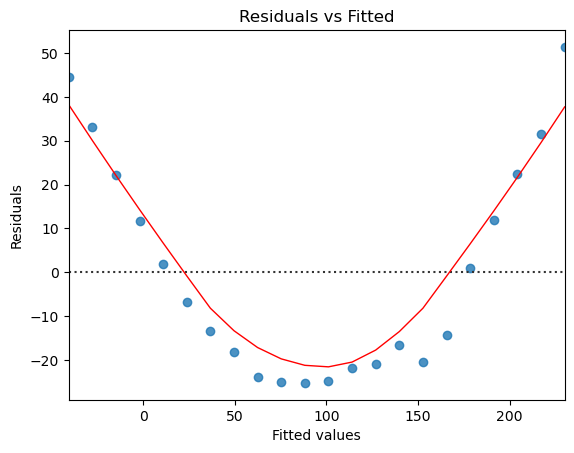

In [56]:
# Residuals vs Fitted
fitted_vals = model.fittedvalues
residuals = model.resid

# Combine fitted values and residuals into a DataFrame for sns.residplot
data = pd.DataFrame({'fitted_vals': fitted_vals, 'residuals': residuals})

# Use the 'x' and 'y' arguments to specify columns in the DataFrame
sns.residplot(x='fitted_vals', y='residuals', data=data, lowess=True, line_kws={'color': 'red', 'lw': 1})

plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

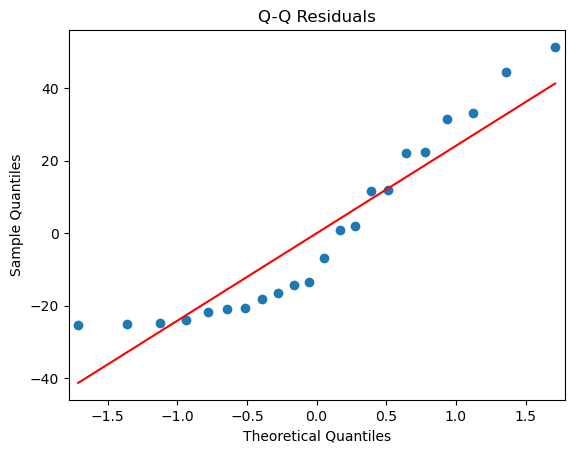

In [58]:
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Residuals')
plt.show()

In [60]:
#Shapiro Wilks Test (test normality of residuals)
res = model.resid
# The null-hypothesis of this test is that the population is normally distributed
print(stats.shapiro(res)) # p > 0.05, residuals are normally distributedres = OmniPowerFit.resid

ShapiroResult(statistic=0.8763855695724487, pvalue=0.010314452461898327)


In [33]:
# Add a new column for year^2
USPop['year_squared'] = USPop['year'] ** 2

# Select the feature variables (numeric variables)
X = USPop[['year', 'year_squared']]

In [34]:
# Fit the OLS model
model2 = sm.OLS(Y, sm.add_constant(X)).fit()

# Print the summary of the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8892.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           5.87e-29
Time:                        14:30:41   Log-Likelihood:                -53.752
No. Observations:                  22   AIC:                             113.5
Df Residuals:                      19   BIC:                             116.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.162e+04    638.928     33.834   

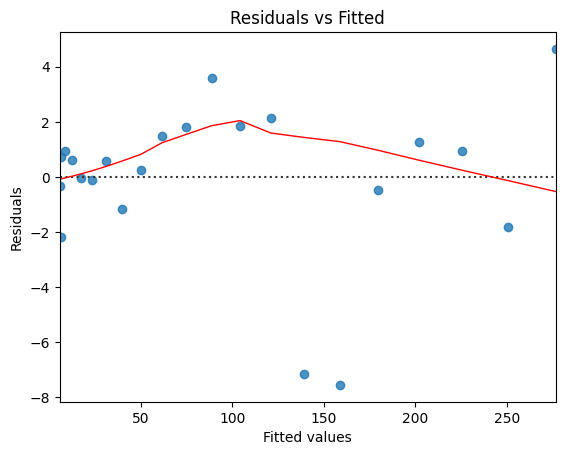

In [35]:
# Residuals vs Fitted
fitted_vals = model2.fittedvalues
residuals = model2.resid

# Combine fitted values and residuals into a DataFrame for sns.residplot
data = pd.DataFrame({'fitted_vals': fitted_vals, 'residuals': residuals})

# Use the 'x' and 'y' arguments to specify columns in the DataFrame
sns.residplot(x='fitted_vals', y='residuals', data=data, lowess=True, line_kws={'color': 'red', 'lw': 1})

plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

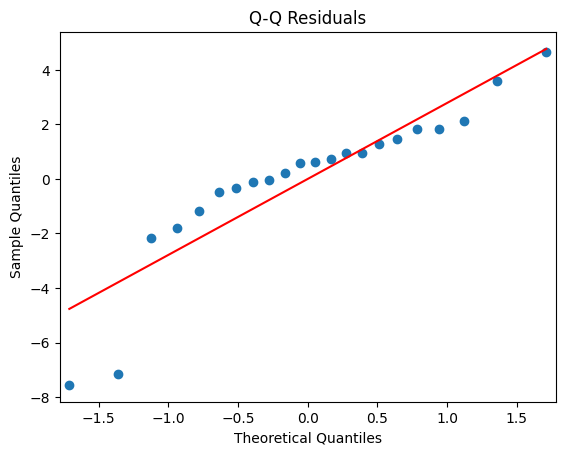

In [36]:
# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Residuals')
plt.show()

In [37]:
#Shapiro Wilks Test (test normality of residuals)
res = model2.resid
# The null-hypothesis of this test is that the population is normally distributed
print(stats.shapiro(res)) # p > 0.05, residuals are normally distributedres = OmniPowerFit.resid

ShapiroResult(statistic=0.8524105221117331, pvalue=0.0037459115258553404)


In [ ]:
# How to improve on model?